In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
df = pd.read_csv("/Users/brianblood/Library/CloudStorage/OneDrive-KansasStateUniversity/School/Senior Year/IMSE 541/IMSE 541 Datasets/HW5.csv")

In [9]:
cols = df.columns.drop(['A', 'B', 'C', 'D'])
cracks = df.melt(id_vars=['A', 'B', 'C', 'D'], value_vars=cols, value_name='length')
cracks.drop(columns='variable', inplace=True)

In [10]:
cracks.head()

,A,B,C,D,length
0,-1,-1,-1,-1,7.037
1,1,-1,-1,-1,14.707
2,-1,1,-1,-1,11.635
3,1,1,-1,-1,17.273
4,-1,-1,1,-1,10.403


In [11]:
cracks_model = ols("length ~ A + B + C + D + A:B + A:C + A:D + B:C + B:D + C:D + A:B:C + A:B:D + A:C:D + B:C:D + A:B:C:D", data=cracks).fit()

In [13]:
print(cracks_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 length   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     469.0
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           3.08e-18
Time:                        20:07:29   Log-Likelihood:                 5.8657
No. Observations:                  32   AIC:                             20.27
Df Residuals:                      16   BIC:                             43.72
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9881      0.050    238.042      0.0

In [14]:
cracks_model_2 = ols("length ~ A + B + C + D + A:B + A:C + A:B:C", data=cracks).fit()
print(cracks_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 length   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1242.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           3.97e-29
Time:                        20:25:34   Log-Likelihood:                 2.7701
No. Observations:                  32   AIC:                             10.46
Df Residuals:                      24   BIC:                             22.19
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9881      0.045    264.659      0.0

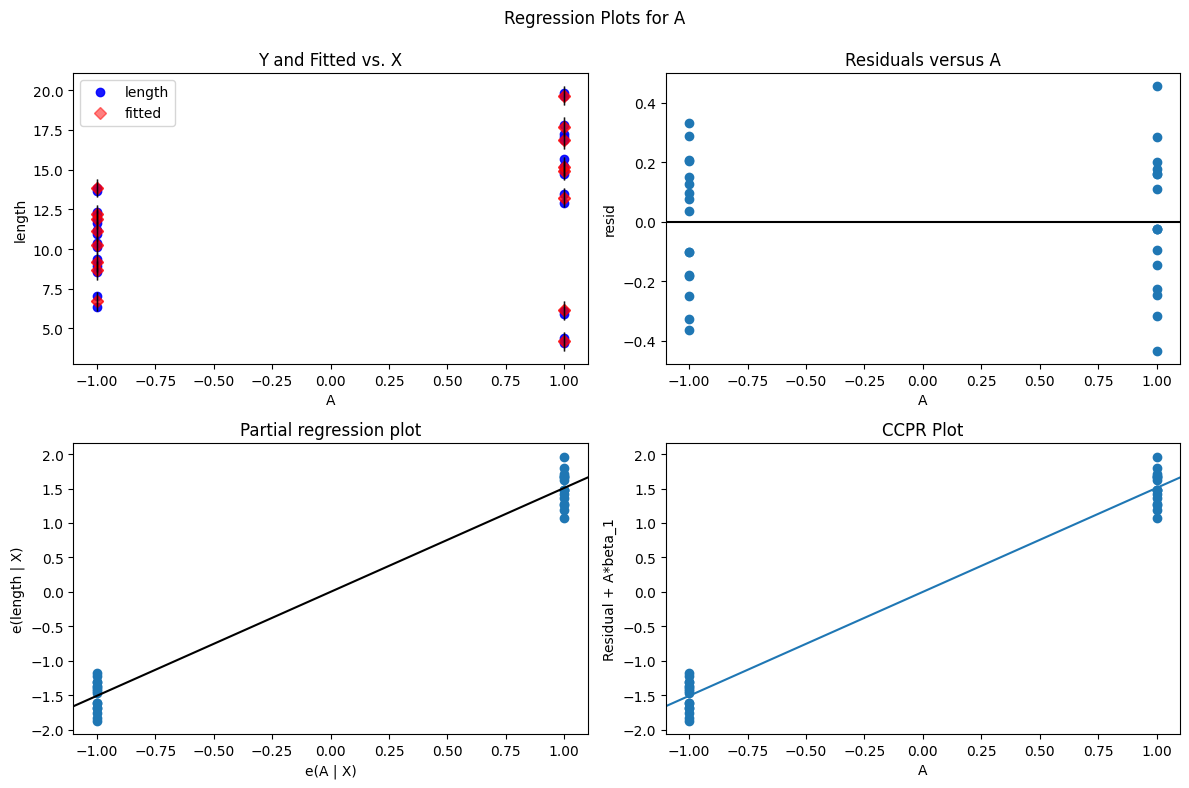

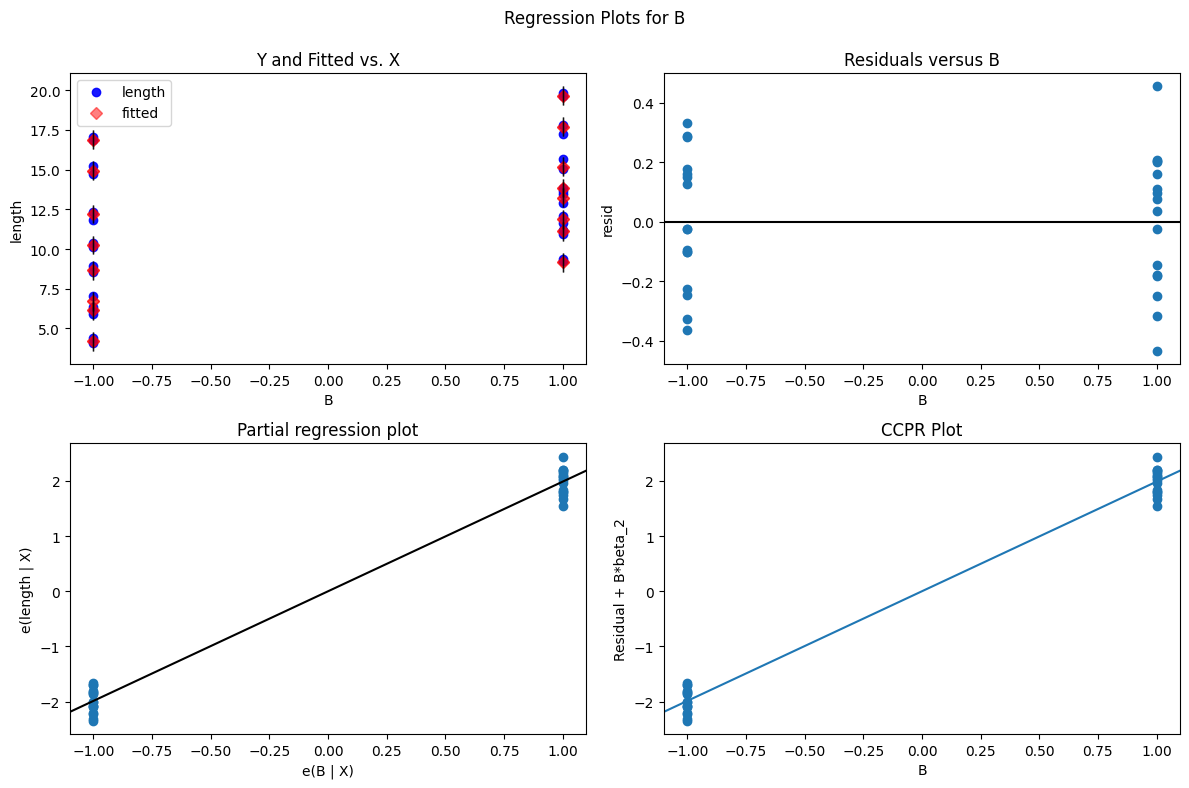

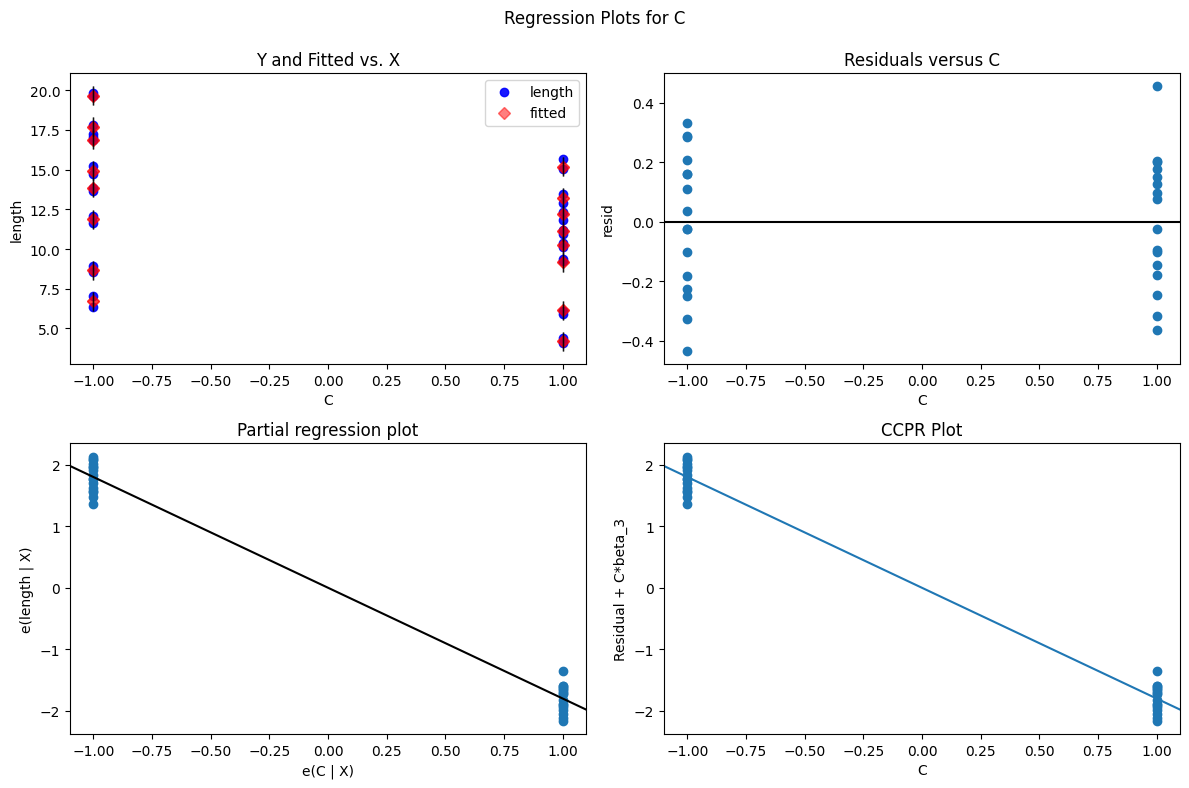

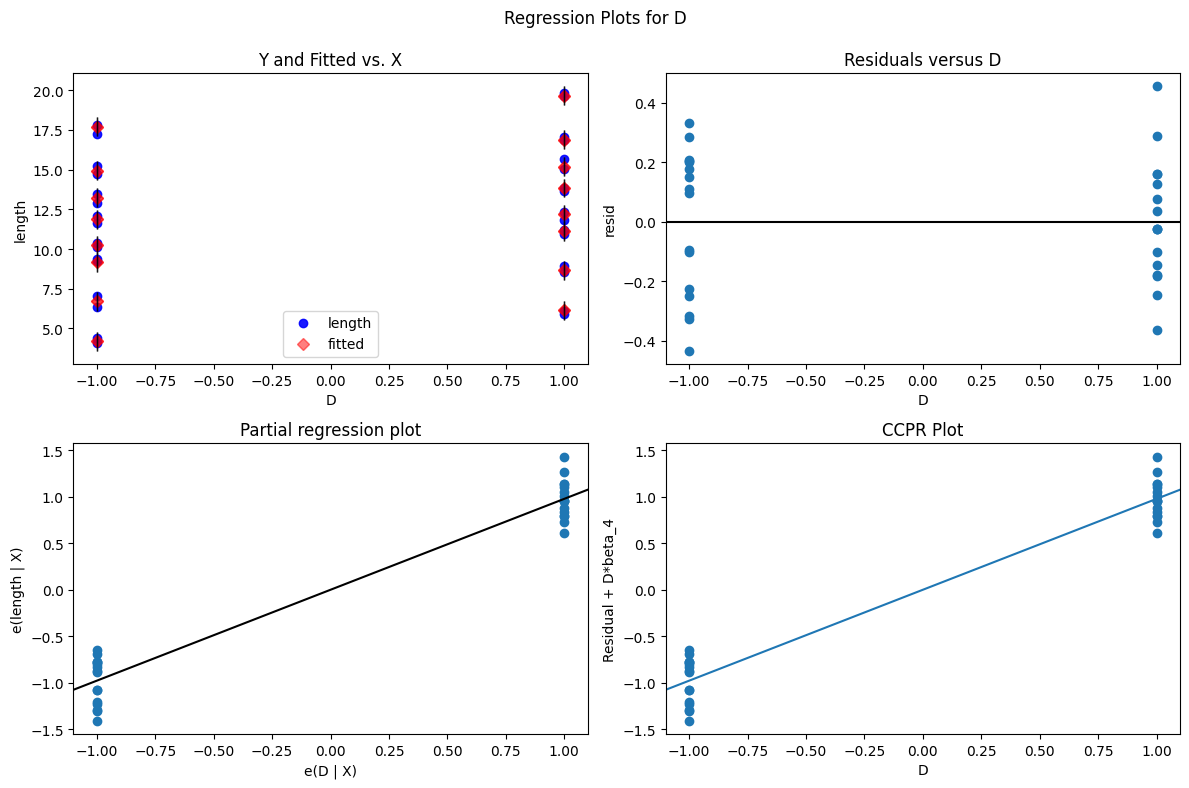

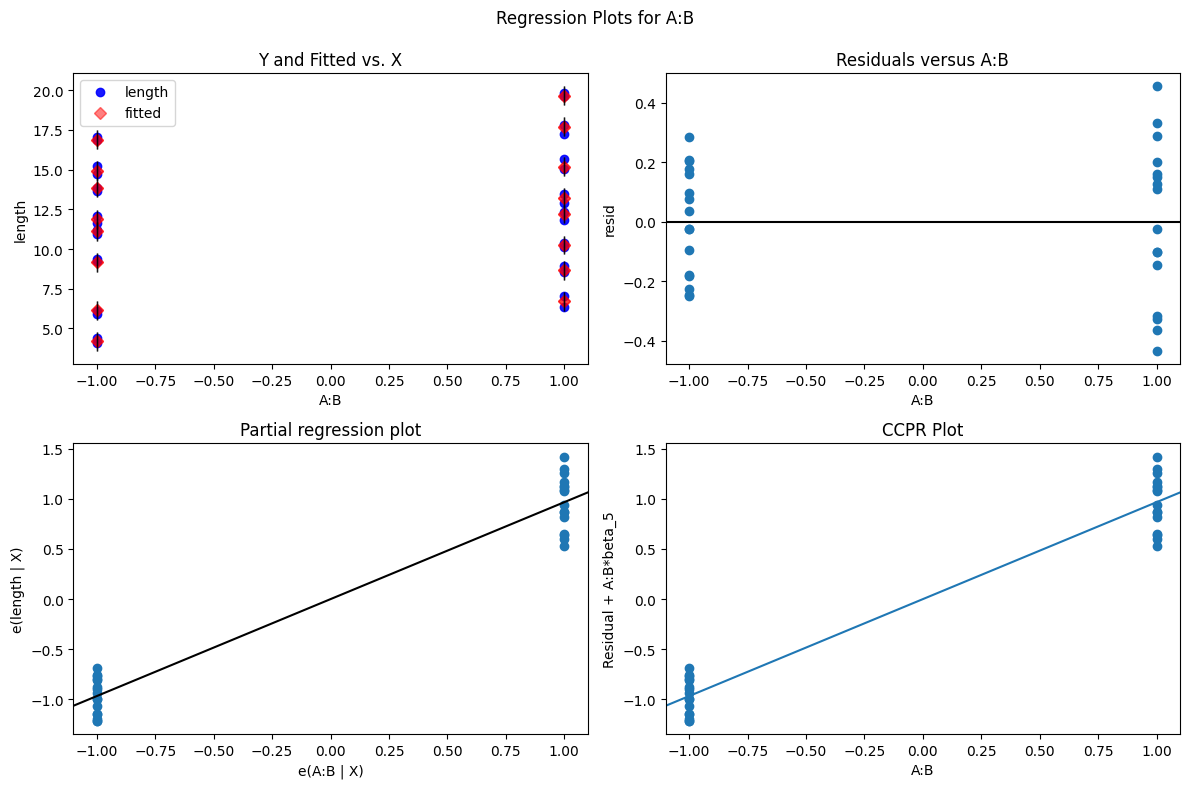

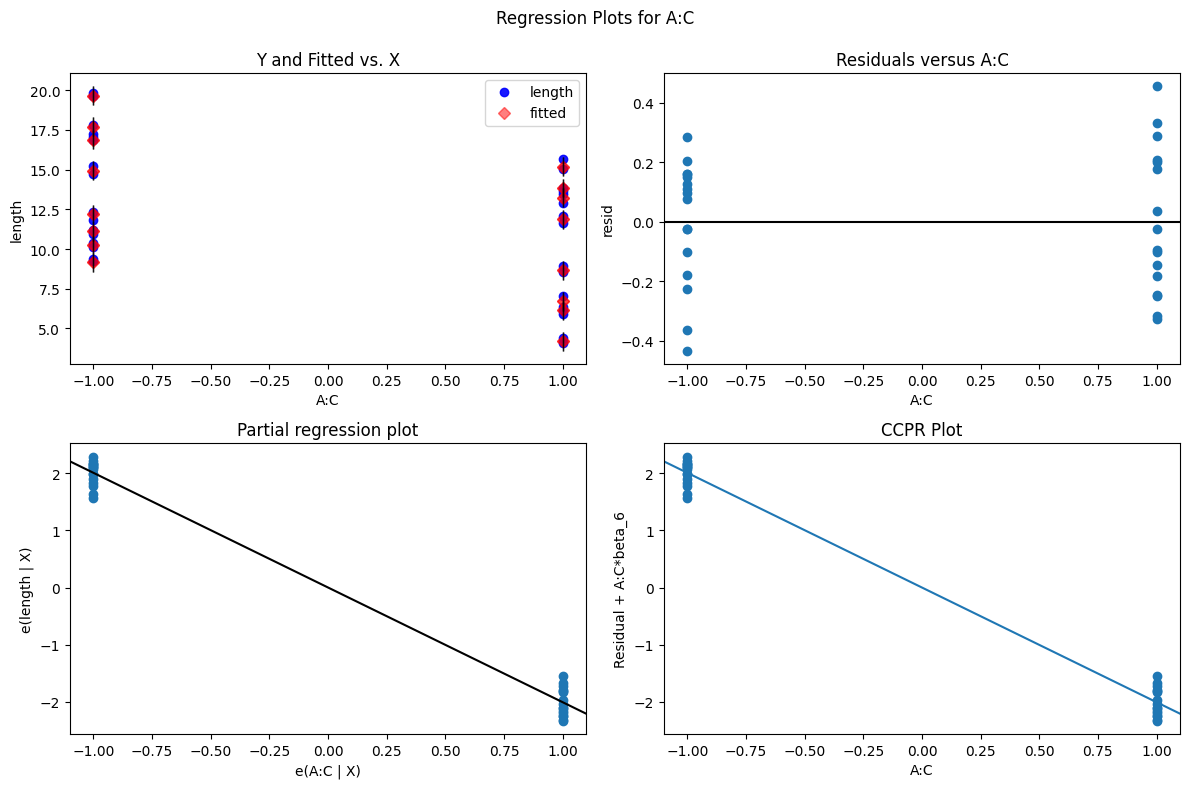

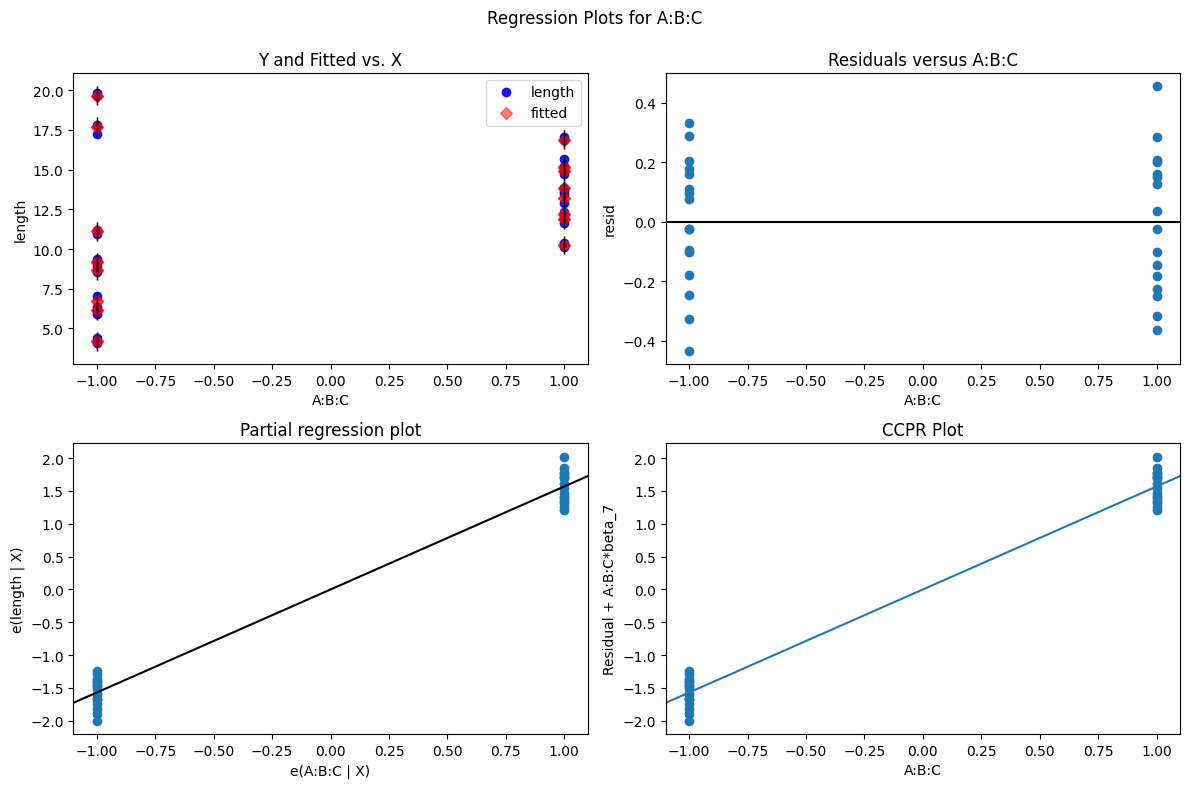

In [29]:
import matplotlib.pyplot as plt
factors = ['A', 'B','C', 'D', 'A:B', 'A:C', 'A:B:C']

for f in factors:
    fig = plt.figure(figsize=(12, 8))
    fig = sm.graphics.plot_regress_exog(cracks_model_2, f, fig=fig)